In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [272]:
dataset = pd.read_csv("sales_data_sample.csv", encoding='latin1')

In [274]:
dataset.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


In [276]:
dataset.tail(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [278]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [280]:
dataset.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [282]:
dataset.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [284]:
dataset.shape

(2823, 25)

In [286]:
missing = dataset.isnull().sum()

missing[missing > 0].sort_values(ascending=False).head()

ADDRESSLINE2    2521
STATE           1486
TERRITORY       1074
POSTALCODE        76
dtype: int64

In [288]:
# Identifying duplicate rows
duplicates = dataset[dataset.duplicated()]

print(duplicates)


Empty DataFrame
Columns: [ORDERNUMBER, QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, SALES, ORDERDATE, STATUS, QTR_ID, MONTH_ID, YEAR_ID, PRODUCTLINE, MSRP, PRODUCTCODE, CUSTOMERNAME, PHONE, ADDRESSLINE1, ADDRESSLINE2, CITY, STATE, POSTALCODE, COUNTRY, TERRITORY, CONTACTLASTNAME, CONTACTFIRSTNAME, DEALSIZE]
Index: []

[0 rows x 25 columns]


In [290]:
# Removing duplicate rows
dataset = dataset.drop_duplicates()

# Optionally, you can reset the index after removing duplicates
dataset.reset_index(drop=True, inplace=True)

# Displaying the updated dataset
print(dataset)


      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0      2/24/2003 0:00   Shipped 

In [292]:
dataset['ORDERDATE'] = pd.to_datetime(dataset['ORDERDATE'])
#dataset['ORDERDATE'] = pd.to_datetime(dataset['ORDERDATE'], format='%Y-%m-%d', errors='coerce')

In [294]:
dataset['COUNTRY']=dataset['COUNTRY'].str.title()
dataset['DEALSIZE']=dataset['DEALSIZE'].str.capitalize()
dataset['STATUS']=dataset['STATUS'].str.capitalize()

In [296]:
dataset[['COUNTRY','DEALSIZE','STATUS']].head()

,COUNTRY,DEALSIZE,STATUS
0,Usa,Small,Shipped
1,France,Small,Shipped
2,France,Medium,Shipped
3,Usa,Medium,Shipped
4,Usa,Medium,Shipped


In [298]:
dataset.drop_duplicates(inplace=True)

print(f"Remaining duplicates : {dataset.duplicated().sum()}")

Remaining duplicates : 0


In [300]:
def remove_outliers(dataset, column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]

# Apply outlier removal to numerical columns
numeric_cols = ['SALES', 'PRICEEACH', 'QUANTITYORDERED']
for col in numeric_cols:
    dataset = remove_outliers(dataset, col)


In [302]:
dataset.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736,2736.000000,2736.000000,2736.000000,2736.000000
mean,10257.736477,34.604167,83.165058,6.498538,3380.774379,2004-05-08 15:45:47.368420992,2.723684,7.114401,2003.806652,98.967836
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.000000,33.000000
25%,10178.000000,27.000000,68.052500,3.000000,2173.320000,2003-11-06 00:00:00,2.000000,4.000000,2003.000000,68.000000
50%,10262.000000,34.000000,94.140000,6.000000,3137.135000,2004-06-15 00:00:00,3.000000,8.000000,2004.000000,97.000000
75%,10332.000000,42.000000,100.000000,9.000000,4330.897500,2004-11-17 00:00:00,4.000000,11.000000,2004.000000,122.000000
max,10425.000000,64.000000,100.000000,18.000000,7962.240000,2005-05-31 00:00:00,4.000000,12.000000,2005.000000,214.000000
std,91.489273,9.260565,20.286715,4.234445,1570.185472,NaN,1.206791,3.663506,0.694380,38.619520


In [304]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling to numerical columns
scaler = MinMaxScaler()
dataset[numeric_cols] = scaler.fit_transform(dataset[numeric_cols])

dataset[numeric_cols].head(10)

,SALES,PRICEEACH,QUANTITYORDERED
0,0.319363,0.941193,0.413793
1,0.305312,0.744940,0.482759
2,0.454834,0.928063,0.603448
3,0.436433,0.771061,0.672414
4,0.631427,1.000000,0.741379
5,0.400747,0.954322,0.517241
6,0.269467,0.810312,0.396552
7,0.672475,1.000000,0.724138
8,0.225453,0.980443,0.275862
9,0.565006,1.000000,0.603448


ORDERDATE
2003-01    14.832740
2003-02    15.088098
2003-03    19.067036
2003-04    21.007174
2003-05    20.976657
Freq: M, Name: SALES, dtype: float64


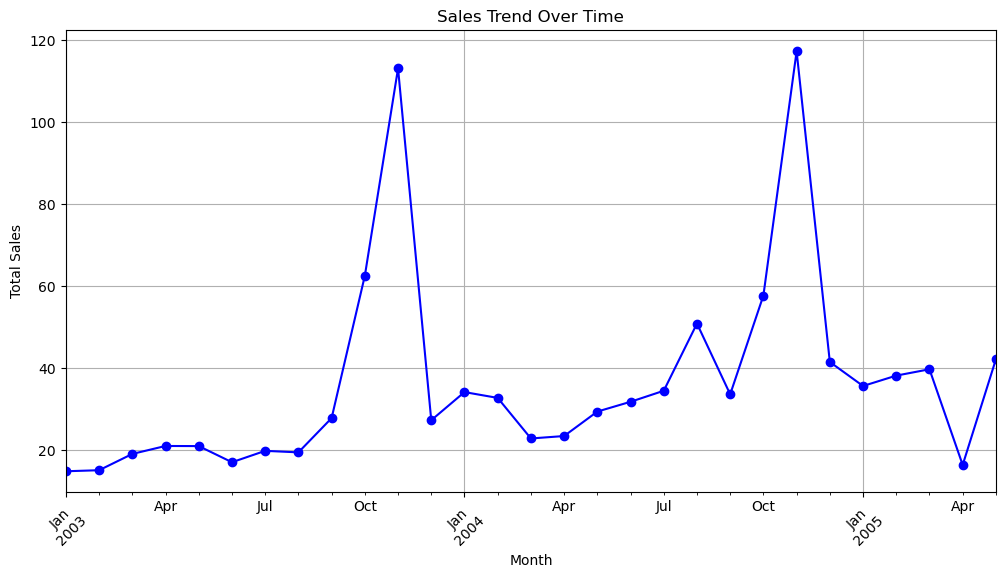

In [306]:
# Convert 'ORDERDATE' to datetime if it's not already
dataset['ORDERDATE'] = pd.to_datetime(dataset['ORDERDATE'], errors='coerce')
# Aggregate sales by month (you can change 'M' to 'Y' for yearly data or 'D' for daily data)
sales_trend = dataset.groupby(dataset['ORDERDATE'].dt.to_period('M'))['SALES'].sum()

# Check the aggregated sales trend (first few rows)
print(sales_trend.head())
import matplotlib.pyplot as plt

# Plot the sales trend
plt.figure(figsize=(12, 6))
sales_trend.plot(kind='line', marker='o', linestyle='-', color='b', title='Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


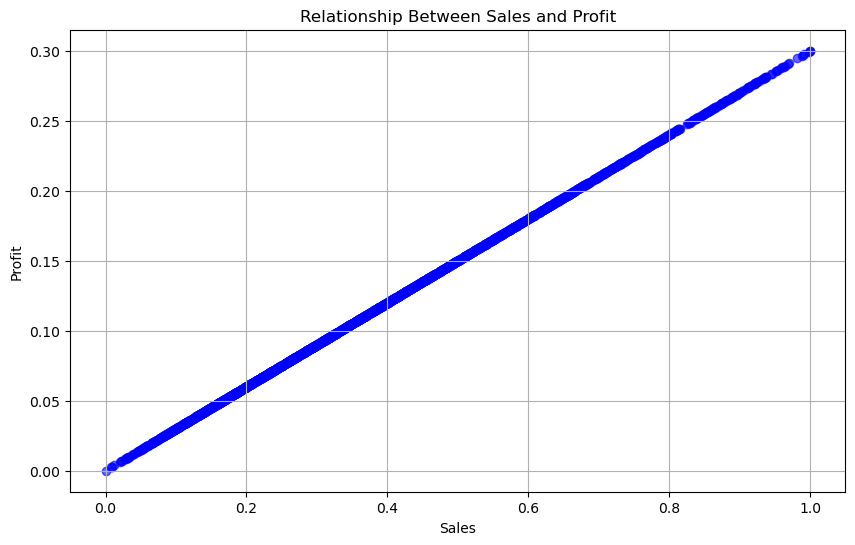

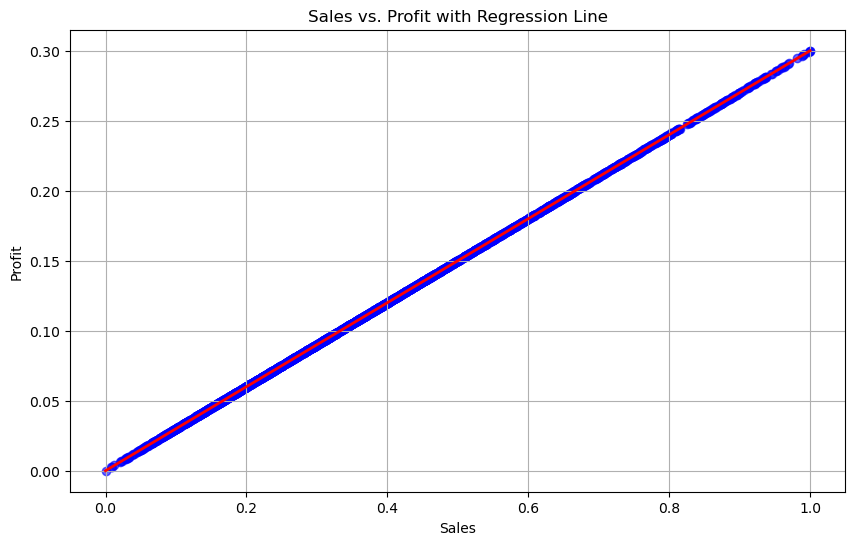

In [308]:
if 'PROFIT' not in dataset.columns:
    dataset['PROFIT'] = dataset['SALES'] * 0.3

#dataset['PROFIT'] = dataset['SALES'] - dataset['PRICEEACH']
import matplotlib.pyplot as plt

# Create a scatter plot to show the relationship between sales and profit
plt.figure(figsize=(10, 6))
plt.scatter(dataset['SALES'], dataset['PROFIT'], color='b', alpha=0.6)

# Add title and labels
plt.title('Relationship Between Sales and Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')

# Display the plot
plt.grid(True)
plt.show()
import seaborn as sns

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='SALES', y='PROFIT', data=dataset, scatter_kws={'color': 'b', 'alpha': 0.6}, line_kws={'color': 'r', 'linewidth': 2})

# Add title and labels
plt.title('Sales vs. Profit with Regression Line')
plt.xlabel('Sales')
plt.ylabel('Profit')

# Display the plot
plt.grid(True)
plt.show()





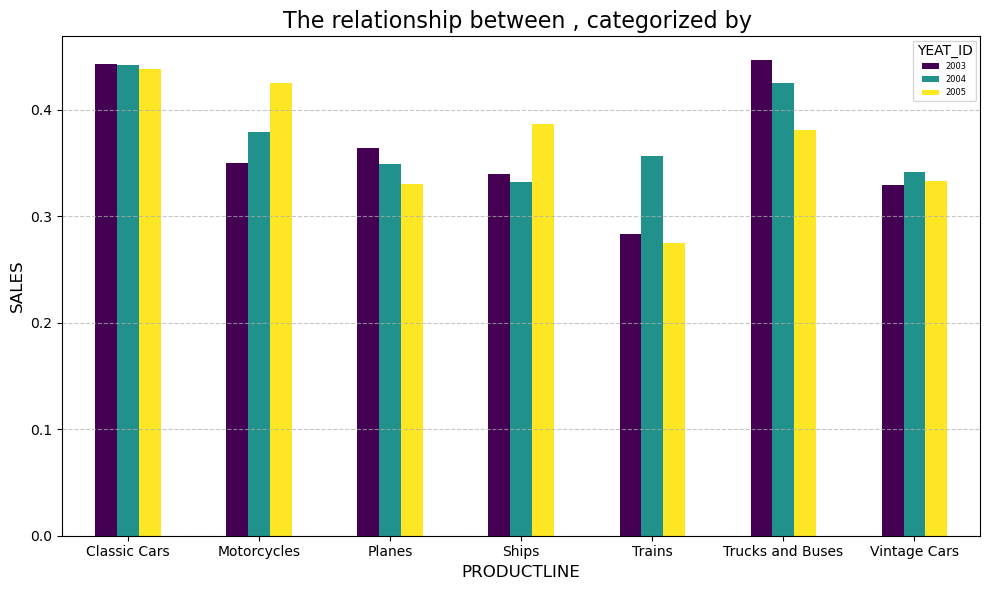

In [310]:
sales_by_category_region = pd.pivot_table(
    dataset, 
    values='SALES', 
    index='PRODUCTLINE', 
    columns='YEAR_ID', 
    aggfunc='mean'
)
sales_by_category_region.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('The relationship between , categorized by ', fontsize=16)
plt.xlabel('PRODUCTLINE', fontsize=12)
plt.ylabel('SALES', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='YEAT_ID', fontsize=6)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

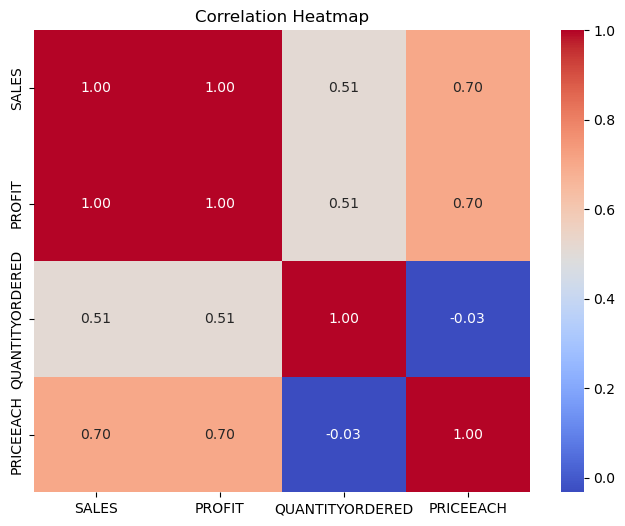

In [312]:
#dataset['PROFIT'] = dataset['SALES'] - dataset['PRICEEACH']
correlation_data = dataset[['SALES', 'PROFIT', 'QUANTITYORDERED', 'PRICEEACH']]


corr_matrix = correlation_data.corr()


plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

PRODUCTLINE
Classic Cars        121.500427
Vintage Cars         59.794825
Trucks and Buses     37.823841
Motorcycles          36.015908
Planes               31.563233
Name: PROFIT, dtype: float64


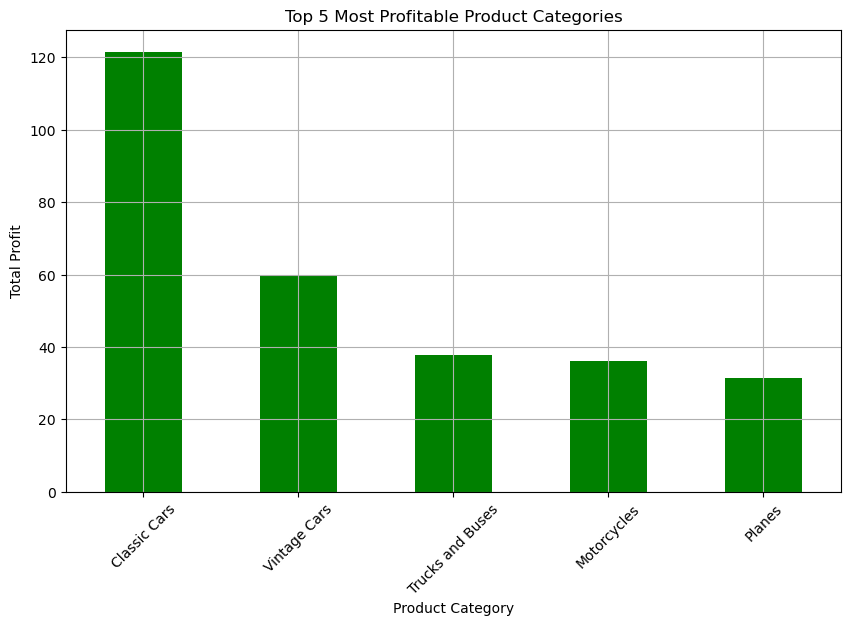

In [314]:
#if 'PROFIT' not in dataset.columns:
  # dataset['PROFIT'] = dataset['SALES'] * 0.3
    #dataset['PROFIT'] = dataset['SALES'] - dataset['PRICEEACH']

# Group by product category and calculate total profit for each category
profit_by_category = dataset.groupby('PRODUCTLINE')['PROFIT'].sum().sort_values(ascending=False)

# Get the top 5 most profitable categories
top_5_categories = profit_by_category.head(5)
print(top_5_categories)
import matplotlib.pyplot as plt

# Plot the top 5 most profitable categories
plt.figure(figsize=(10, 6))
top_5_categories.plot(kind='bar', color='g')

# Add title and labels
plt.title('Top 5 Most Profitable Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.show()

